<a href="https://colab.research.google.com/github/Winfred-Achieng/Image-Classification-Machine-Learning/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import files
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [2]:
uploaded = files.upload()

Saving Nairobi Office Price Ex.csv to Nairobi Office Price Ex.csv


 Read the dataset and create a Pandas DataFrame
bold text

In [7]:
data = pd.read_csv(io.BytesIO(uploaded['Nairobi Office Price Ex.csv']))

In [21]:
data

,LOC,FUR,AMB,PROX_SCH,PROX_ROAD,PROX_MALL,WATER,HK_SER,SIZE,PRICE
0,karen,yes,serene,no,yes,yes,yes,yes,32.502345,31.707006
1,madaraka,yes,semi_serene,yes,yes,yes,no,no,53.426804,68.777596
2,karen,no,noisy,no,yes,yes,yes,yes,61.530358,62.562382
3,karen,yes,semi_serene,no,no,no,yes,yes,47.475640,71.546632
4,buruburu,no,semi_serene,no,yes,yes,yes,yes,59.813208,87.230925
5,donholm,no,serene,no,no,yes,no,yes,55.142188,78.211518
6,langata,no,very_noisy,yes,yes,no,no,yes,52.211797,79.641973
7,langata,yes,serene,no,no,yes,yes,no,39.299567,59.171489
8,donholm,yes,semi_serene,yes,no,no,yes,no,48.105042,75.331242
9,karen,yes,serene,no,no,no,no,no,52.550014,71.300880


 Data Preprocessing

In [14]:
X = data[['LOC', 'FUR', 'AMB', 'PROX_SCH', 'PROX_ROAD', 'PROX_MALL', 'WATER', 'HK_SER', 'SIZE']]

In [15]:
y = data['PRICE']

performing one-hot encoding

In [16]:
X = pd.get_dummies(X, columns=['LOC', 'FUR', 'AMB', 'PROX_SCH', 'PROX_ROAD', 'PROX_MALL', 'WATER', 'HK_SER'], drop_first=True)

converting to NumPy arrays

In [17]:
X = X.values
y = y.values

data splitting

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


feature scaling

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Build the ANN model

In [26]:
model = Sequential([
    Dense(8, input_dim=X_train.shape[1], activation='relu'),
    Dense(8, activation='relu'),
    Dense(1)  # Output layer for regression
])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 120       
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 201 (804.00 Byte)
Trainable params: 201 (804.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


compile the model

In [29]:
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))


train the model

In [36]:
history = model.fit(X_train, y_train, epochs=3)

Epoch 1/3
1/1 [==============================] - 0s 11ms/step - loss: 4488.5410
Epoch 2/3
1/1 [==============================] - 0s 13ms/step - loss: 4482.6104
Epoch 3/3
1/1 [==============================] - 0s 9ms/step - loss: 4476.6460


make predictions

In [35]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 23ms/step


model evaluation

In [37]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")


Mean Squared Error (MSE): 4339.8518261274985


visualization

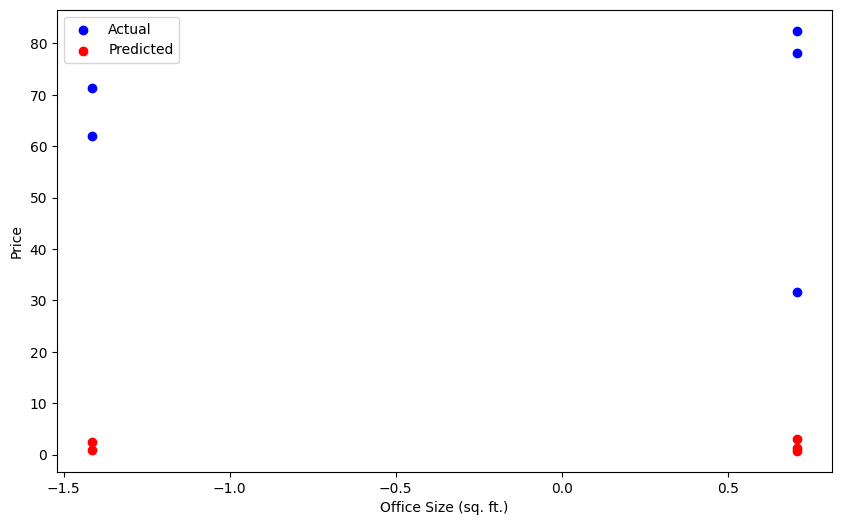

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, -1], y_test, label='Actual', color='blue')  # Plot against 'SIZE'
plt.scatter(X_test[:, -1], y_pred, label='Predicted', color='red')  # Plot against 'SIZE'
plt.xlabel('Office Size (sq. ft.)')
plt.ylabel('Price')
plt.legend()
plt.show()